# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model
import pandas as pd

In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
data_car = pd.read_csv(filename, sep=",")
data_car.head(5)

,km,year,powerPS,avgPrice
0,125000,2001,40,1371.11
1,150000,2001,40,1298.70
2,5000,2001,60,1232.43
3,50000,2001,60,1733.89
4,60000,2001,60,1985.24


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




linregress intercept is:  -3018309.484956958
linregress slope is:  1509.093825335221


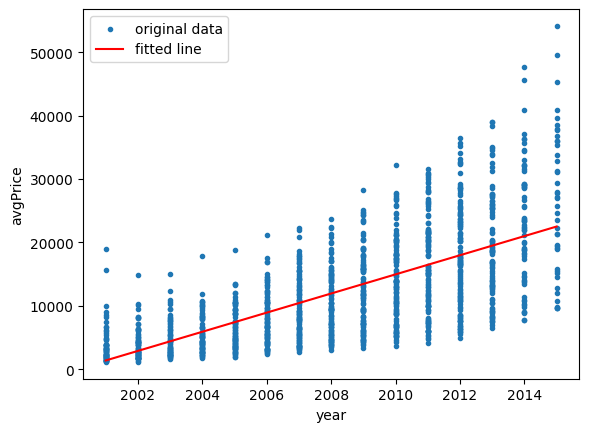

In [3]:
# linear regression with scipy.stats.linregress (estimate price from year)

p_y_res = stats.linregress(data_car["year"], data_car["avgPrice"])

print("linregress intercept is: ", p_y_res.intercept)
print("linregress slope is: ", float(p_y_res.slope))

plt.scatter(data_car["year"], data_car["avgPrice"], marker = '.', label='original data')
plt.plot(data_car["year"], p_y_res.intercept + p_y_res.slope*data_car["year"], 'r', label='fitted line')
plt.xlabel("year")
plt.ylabel("avgPrice")
plt.legend()

plt.show()

LinearRegression intercept is:  -3049629.6022414365
LinearRegression slope is:  1524.7021850748647


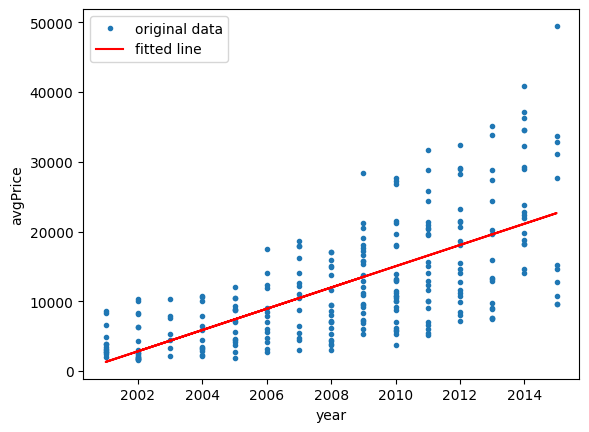

In [13]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

year_reshape = data_car["year"].values.reshape(-1, 1)
price_reshape = data_car["avgPrice"]#.values.reshape(-1, 1).shape

# Split the data into training/testing sets
year_train, year_test, price_train, price_test = sl.model_selection.train_test_split(year_reshape, price_reshape, test_size=0.2)

regr = linear_model.LinearRegression()

p_y_reg = regr.fit(year_train, price_train)
price_pred = regr.predict(year_test)

print("LinearRegression intercept is: ", p_y_reg.intercept_)
print("LinearRegression slope is: ", float(p_y_reg.coef_))




plt.plot(year_test, price_test, '.', label='original data')
plt.plot(year_test, price_pred, color="red", label  = 'fitted line')
plt.xlabel("year")
plt.ylabel("avgPrice")
plt.legend()

plt.show()

least squares intercept is:  -3020647.9370350954
least squares slope is:  1510.2582495831641


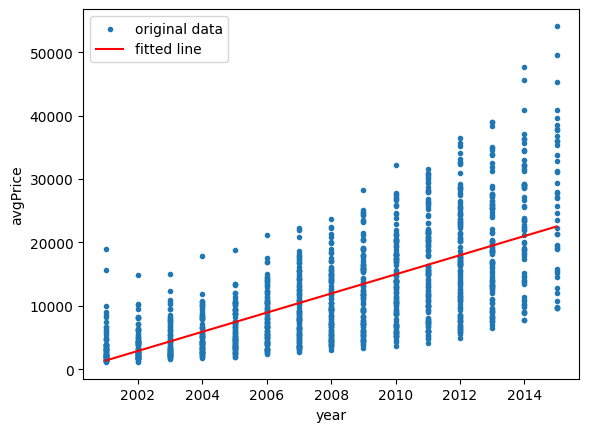

In [5]:
# Define the independent variable (x) and dependent variable (y) from the data
# You should get exactly the same solution of linregress !

x1 = data_car["year"]
y1 = data_car["avgPrice"]

# Calculate the mean of x and y
x1_mean = np.mean(x1)
y1_mean = np.mean(y1)

# Calculate the variance of x
x1_var = np.var(x1)

# Calculate the covariance of x and y
x1y1_cov = np.cov(x1, y1)[0][1]

# Calculate the regression slope (b) and intercept (a)
b = x1y1_cov / x1_var
a = y1_mean - b * x1_mean

# Calculate the predicted values of y (y_pred) using the regression equation
y1_pred = a + b * x1

print("least squares intercept is: ", a)
print("least squares slope is: ", b)

# Plot the data and the regression line
plt.scatter(x1, y1, marker='.', label='original data')
plt.plot(x1, y1_pred, color='red', label='fitted line')
plt.xlabel('year')
plt.ylabel('avgPrice')
plt.legend()

plt.show()

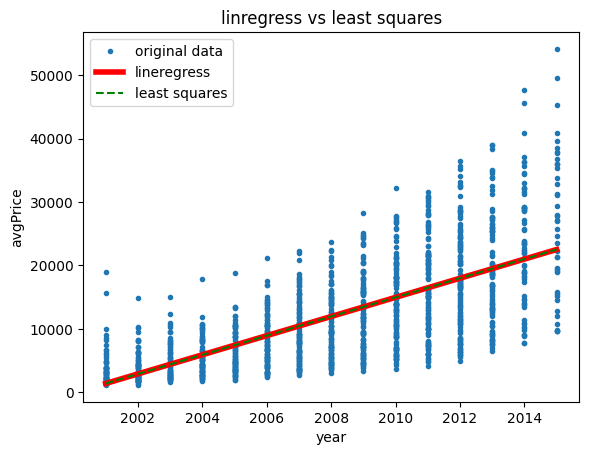

In [6]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.plot(data_car["year"], data_car["avgPrice"], '.', label='original data')
plt.plot(data_car["year"], p_y_res.intercept + p_y_res.slope*data_car["year"], 'r', label='lineregress', linewidth=4)
plt.plot(data_car["year"], y1_pred, '--g', label='least squares')
plt.xlabel("year")
plt.ylabel("avgPrice")
plt.title("linregress vs least squares")
plt.legend()

plt.show()

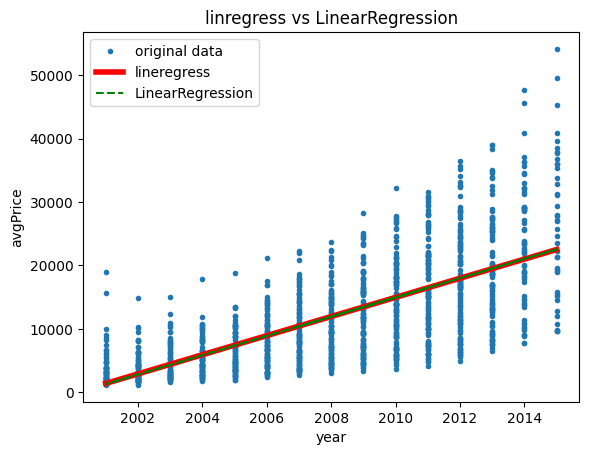

In [7]:
plt.plot(data_car["year"], data_car["avgPrice"], '.', label='original data')
plt.plot(data_car["year"], p_y_res.intercept + p_y_res.slope*data_car["year"], 'r', label='lineregress', linewidth=4)
plt.plot(year_test, price_pred, "--g", label  = 'LinearRegression')
plt.xlabel("year")
plt.ylabel("avgPrice")
plt.title("linregress vs LinearRegression")
plt.legend()

plt.show()

linregress intercept is:  -1303.9126989879915
linregress slope is:  90.33080718820229


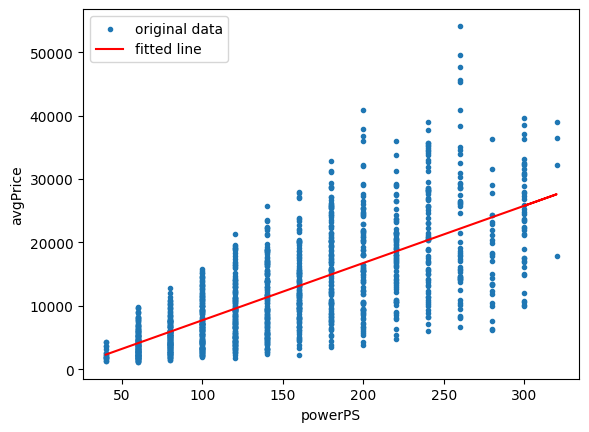

In [14]:
# linear regression with linregress (estimate price from power)

p_p_res = stats.linregress(data_car["powerPS"], data_car["avgPrice"])
print("linregress intercept is: ", p_p_res.intercept)
print("linregress slope is: ", float(p_p_res.slope))

plt.scatter(data_car["powerPS"], data_car["avgPrice"], marker = '.', label='original data')
plt.plot(data_car["powerPS"], p_p_res.intercept + p_p_res.slope*data_car["powerPS"], 'r', label='fitted line')
plt.xlabel("powerPS")
plt.ylabel("avgPrice")
plt.legend()

plt.show()

linregress intercept is:  16692.345302519738
linregress slope is:  -0.054251513309725656


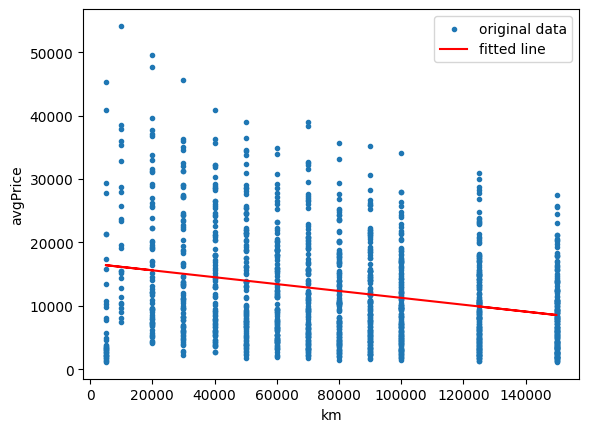

In [15]:
# linear regression with linregress (estimate price from km)

p_k_res = stats.linregress(data_car["km"], data_car["avgPrice"])
print("linregress intercept is: ", p_k_res.intercept)
print("linregress slope is: ", float(p_k_res.slope))

plt.scatter(data_car["km"], data_car["avgPrice"], marker = '.', label='original data')
plt.plot(data_car["km"], p_k_res.intercept + p_k_res.slope*data_car["km"], 'r', label='fitted line')
plt.xlabel("km")
plt.ylabel("avgPrice")
plt.legend()

plt.show()

In [16]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print("year-avgPrice R2 value:", (p_y_res.rvalue)**2)
print("powerPS-avgPrice R2 value:", (p_p_res.rvalue)**2)
print("km-avgPrice R2value:", (p_k_res.rvalue)**2)

year-avgPrice R2 value: 0.4579287325240126
powerPS-avgPrice R2 value: 0.5020431471760578
km-avgPrice R2value: 0.06619646812295613


Coefficients: [1312.06731115   80.03812951]
Coefficient of determination: 0.85


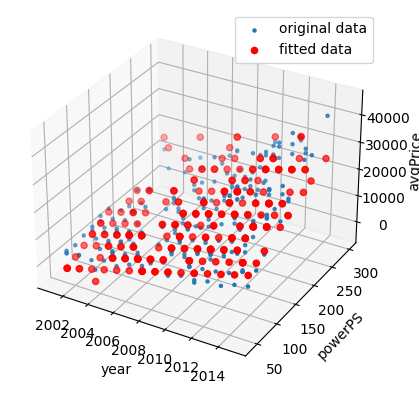

In [11]:
# Define the independent variables (X) and dependent variable (y) from the data
X = data_car[["year", "powerPS"]]
y = data_car["avgPrice"]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = sl.model_selection.train_test_split(X, y, test_size=0.2)

# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr2.predict(X_test)

# The coefficients
print('Coefficients:', regr2.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
    % regr2.score(X_test, y_test))

# Plot outputs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test["year"], X_test["powerPS"], y_test, marker='.', label='original data')
ax.scatter(X_test["year"], X_test["powerPS"], y_pred, color="red", label  = 'fitted data')
ax.set_xlabel('year')
ax.set_ylabel('powerPS')
ax.set_zlabel('avgPrice')
plt.legend()

plt.show()

